In [1]:
# Importing dependencies
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Opening data
final_model_data = pd.read_csv('lending-club/transformed_final_data.csv')
final_model_data.head()

,Unnamed: 0,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,2,27.144176,1,2.377693,432.66,1,0,11.050890,0,paid,...,0.0,0.0,100.0,50.0,0.0,0.0,60.223059,26.540936,18.370906,24.594526
1,8,21.544347,0,1.870263,306.45,6,2,11.350407,0,paid,...,0.0,2.0,95.7,28.6,1.0,0.0,39.386256,30.350337,25.406682,31.345765
2,13,26.207414,1,2.969388,471.70,7,2,11.918391,0,default,...,0.0,3.0,100.0,14.3,1.0,0.0,40.375424,33.094617,21.757671,31.521192
3,16,29.240177,0,2.013569,777.55,1,0,11.599103,0,paid,...,0.0,0.0,100.0,20.0,0.0,0.0,72.020827,40.827752,33.737307,43.465468
4,20,31.037762,1,2.555676,678.49,1,0,11.082143,1,paid,...,0.0,4.0,100.0,25.0,0.0,0.0,64.768407,34.896839,32.396118,24.972770


In [3]:
# Selecting target and features
X = final_model_data.drop(columns=['Unnamed: 0', 'loan_status'], axis=0)
y = final_model_data.loan_status

In [4]:
X.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,27.144176,1,2.377693,432.66,1,0,11.050890,0,4,10.78,...,0.0,0.0,100.0,50.0,0.0,0.0,60.223059,26.540936,18.370906,24.594526
1,21.544347,0,1.870263,306.45,6,2,11.350407,0,1,13.07,...,0.0,2.0,95.7,28.6,1.0,0.0,39.386256,30.350337,25.406682,31.345765
2,26.207414,1,2.969388,471.70,7,2,11.918391,0,2,9.39,...,0.0,3.0,100.0,14.3,1.0,0.0,40.375424,33.094617,21.757671,31.521192
3,29.240177,0,2.013569,777.55,1,0,11.599103,0,2,26.02,...,0.0,0.0,100.0,20.0,0.0,0.0,72.020827,40.827752,33.737307,43.465468
4,31.037762,1,2.555676,678.49,1,0,11.082143,1,2,21.77,...,0.0,4.0,100.0,25.0,0.0,0.0,64.768407,34.896839,32.396118,24.972770


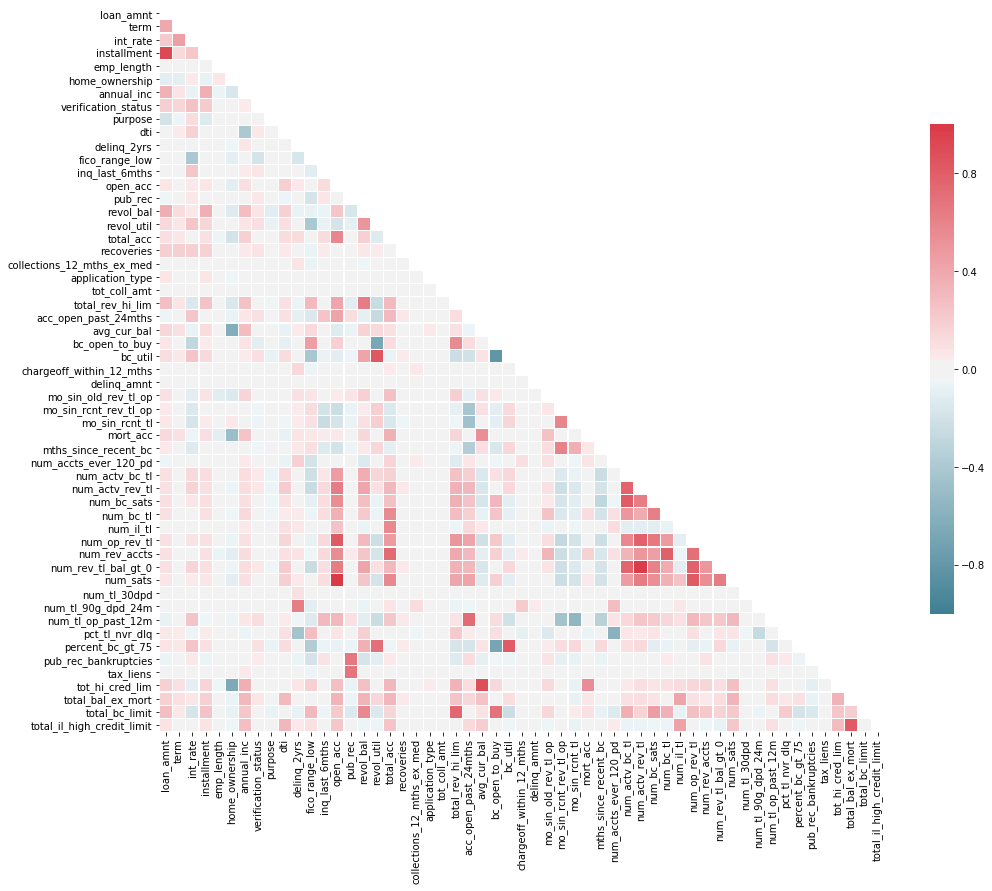

In [5]:
# Correlation between features
corr=X._get_numeric_data().corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.1, cbar_kws={"shrink": .5},xticklabels=True, yticklabels=True)
plt.tight_layout()
plt.savefig('./resources/figure.png', dpi=600)

Given an imbalanced dataset, such as the Lending Club dataset where the rate of positive examples is about 85%, accuracy does not indicate the true performance of the model. The accuracy will depend on the overall default rate of the test data set. For example, in this case, a model that predicts any example to be non-defaulting would still achieve 85% accuracy. Furthermore, some models will bias toward classifications that occur more often, such as SVM and Logistic Regression. Instead, we will look at sensitivity.

In [6]:
# Importing scikit modules
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import classification_report

# Model evaluation modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [7]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [8]:
# Scaling features
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()

label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [10]:
encoded_y_train
encoded_y_train.shape

(354511,)

## Logistic Regression

In [11]:
# Creating a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(multi_class='multinomial', solver ='saga')
logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
logreg.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
print(f"Training Data Score: {logreg.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {logreg.score(X_test_scaled, y_test)}")

Training Data Score: 0.9126204828623089
Testing Data Score: 0.9136082456778736


In [14]:
predictions = logreg.predict(X_test_scaled)
predictions_LR = pd.DataFrame({"Prediction": predictions, "Actual": y_test})
predictions_LR.head()

,Prediction,Actual
86766,paid,paid
82602,paid,paid
395711,paid,paid
196538,paid,paid
206475,paid,paid


In [15]:
coefficients = logreg.coef_
coefficients_array = coefficients[0]
coefficients_array

array([ 5.70097200e-01, -3.59062209e-01, -5.96032725e-01, -6.59692935e-01,
       -7.65574395e-03, -1.18747375e-01,  8.51885222e-02, -1.43056495e-02,
       -1.93143421e-01, -4.71271026e-01, -7.15477791e-01,  2.64709575e-01,
       -7.90275569e-02,  2.49436020e-01, -5.11795341e-01,  1.58993700e-01,
       -1.10598178e-02,  3.43285875e-02, -8.22400799e+01, -8.21262647e-01,
       -1.00903995e-01, -3.93199605e-02,  4.35684847e-01, -8.13540217e-01,
        2.44753092e-02, -1.70293722e-01, -2.98066414e-02, -1.25616982e-01,
       -2.24078663e-01,  1.84211211e-02, -1.88019617e-01,  3.80800042e-01,
        3.69870497e-01,  5.06922214e-01, -1.04800265e-01, -5.04731902e-03,
       -6.95192248e-01, -4.10093791e-01,  2.01929682e-01,  1.58745050e-01,
        2.62041760e-01,  2.24165415e-01,  2.16605155e-02, -4.00939320e-01,
        3.32336639e-01,  2.06632704e-01, -2.77353841e-02, -5.46379971e-02,
       -4.51165569e-02, -3.33311428e-01, -4.69680888e-01,  2.61408485e-01,
       -1.93213793e-01,  

In [16]:
# from sklearn.feature_selection import RFE
# predictors = X_train
# selector = RFE(logreg, n_features_to_select=10)
# selector = selector.fit(predictors, y_train)

In [17]:
# import eli5
# from eli5.sklearn import PermutationImportance
# perm = PermutationImportance(classifier, random_state=1).fit(X_train_scaled,y_train)
# eli5.show_weights(perm, feature_names = X.columns.tolist())

In [18]:
# F1 score
y_true = y_test
y_pred = predictions

#print(f1_score(y_true, y_pred))
print(f1_score(y_true, y_pred, average='macro'))
print(f1_score(y_true, y_pred, average='micro'))
print(f1_score(y_true, y_pred, average='weighted'))
print(f1_score(y_true, y_pred, average=None))

0.8418296797924882
0.9136082456778736
0.9044247080859502
[0.7352781  0.94838126]


In [ ]:
# Generating report
target_names = final_model_data.loan_status
print(classification_report(y_true, y_pred, target_names=target_names))

In [19]:
# Confusion Matric
confusion_matrix(y_true, y_pred)

array([[14178, 10197],
       [   12, 93784]])

In [20]:
scoring = ['accuracy', 'precision']

Confusion matrix, without normalization
[[14178 10197]
 [   12 93784]]
Normalized confusion matrix
[[5.817e-01 4.183e-01]
 [1.279e-04 9.999e-01]]


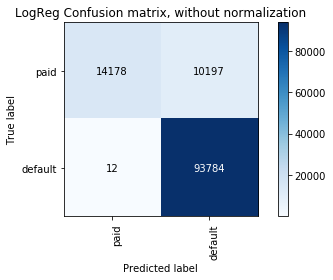

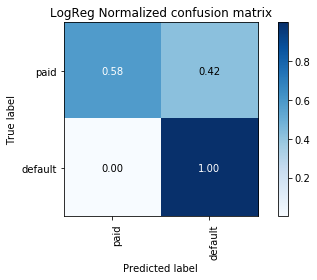

In [21]:
class_names = final_model_data.loan_status

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = class_names.unique()
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='LogReg Confusion matrix, without normalization')
plt.savefig('resources/plots/LogReg_no_norm_confusion_matrix.png', dpi=600)
# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='LogReg Normalized confusion matrix')

plt.savefig('resources/plots/LogReg_normalized_confusion_matrix.png', dpi=600)
plt.show()

In [22]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ", tn)
print("False Positives: ", fp)
print("False Negatives: ", fn)
print("True Positives: ", tp)

True Negatives:  14178
False Positives:  10197
False Negatives:  12
True Positives:  93784


In [24]:
#Accuracy
LogReg_Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print(f"Accuracy: {LogReg_Accuracy}")

Accuracy: 91.36082456778736


In [25]:
#Precision 
LogReg_Precision = tp/(tp+fp) 
print(f"Precision: {LogReg_Precision}")

Precision: 0.9019340071743877


In [27]:
#Recall 
LogReg_Recall = tp/(tp+fn) 
print(f"Recall: {LogReg_Recall}")

Recall: 0.999872062774532


In [29]:
#F1 Score
LogReg_f1 = (2*LogReg_Precision*LogReg_Recall)/(LogReg_Precision + LogReg_Recall)
print(f"F1 Score: {LogReg_f1}")

F1 Score: 0.9483812576791033


In [30]:
#F-beta score calculation
def fbeta(LogReg_Precision, LogReg_Recall, beta):
    return ((1+pow(beta,2))*LogReg_Precision*LogReg_Recall)/(pow(beta,2)*LogReg_Precision + LogReg_Recall)
            
LogReg_f2 = fbeta(LogReg_Precision, LogReg_Recall, 2)
LogReg_f0_5 = fbeta(LogReg_Precision, LogReg_Recall, 0.5)

print(f"F2 {LogReg_f2}")
print(f"\nF0.5 {LogReg_f0_5}")

F2 0.978619056066282

F0.5 0.9199560543043239


In [31]:
#Specificity 
LogReg_Specificity = tn/(tn+fp)
print(f"Specificity {LogReg_Specificity}")

Specificity 0.5816615384615385


/Users/rogerlefort/anaconda3/envs/loanDefault/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


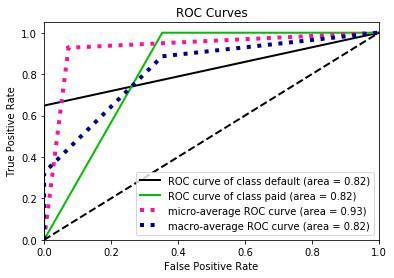

In [32]:
#ROC
import scikitplot as skplt #to make things easy
y_pred_proba = logreg.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_pred_proba)

plt.savefig('resources/plots/LogReg_roc.png', dpi=600)
plt.show()

## Decision Tree

In [33]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_scaled, y_train)

In [34]:
print(f"Training Data Score: {clf.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {clf.score(X_test_scaled, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.8770172038825093


In [35]:
predictions = clf.predict(X_test_scaled)
predictions_CLF = pd.DataFrame({"Prediction": predictions, "Actual": y_test})
predictions_CLF.head()

,Prediction,Actual
86766,paid,paid
82602,paid,paid
395711,paid,paid
196538,paid,paid
206475,paid,paid


In [36]:
# F1 score
y_true = y_test
y_pred = predictions

#print(f1_score(y_true, y_pred))
print(f1_score(y_true, y_pred, average='macro'))
print(f1_score(y_true, y_pred, average='micro'))
print(f1_score(y_true, y_pred, average='weighted'))
print(f1_score(y_true, y_pred, average=None))

0.8163638171101288
0.8770172038825093
0.8783630921215464
[0.711 0.922]


In [37]:
# Confusion Matric
confusion_matrix(y_true, y_pred)

array([[17862,  6513],
       [ 8020, 85776]])

Confusion matrix, without normalization
[[ 4009 20366]
 [ 6016 87780]]
Normalized confusion matrix
[[0.164 0.836]
 [0.064 0.936]]


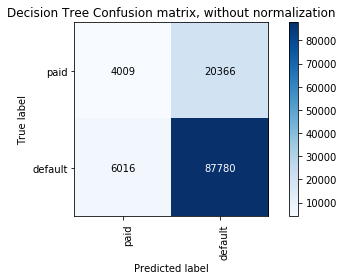

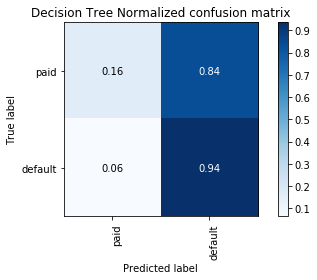

In [54]:
class_names = final_model_data.loan_status

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = class_names.unique()
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Decision Tree Confusion matrix, without normalization')
plt.savefig('resources/plots/DTree_no_norm_confusion_matrix.png', dpi=600)
# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Decision Tree Normalized confusion matrix')
plt.savefig('resources/plots/DTree_normalized_confusion_matrix.png', dpi=600)

plt.show()

In [39]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ", tn)
print("False Positives: ", fp)
print("False Negatives: ", fn)
print("True Positives: ", tp)

True Negatives:  17862
False Positives:  6513
False Negatives:  8020
True Positives:  85776


In [40]:
#Accuracy
DTree_Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print(f"Accuracy: {DTree_Accuracy}")

Accuracy: 87.70172038825092


In [41]:
#Precision 
DTree_Precision = tp/(tp+fp) 
print(f"Precision: {DTree_Precision}")

Precision: 0.9294282092123655


In [42]:
#Recall 
DTree_Recall = tp/(tp+fn) 
print(f"Recall: {DTree_Recall}")

Recall: 0.9144952876455286


In [45]:
#F1 Score
DTree_f1 = (2*DTree_Precision*DTree_Recall)/(DTree_Precision + DTree_Recall)
print(f"F1 Score: {DTree_f1}")

F1 Score: 0.921901281672354


In [47]:
#F-beta score calculation
def fbeta(DTree_Precision, DTree_Recall, beta):
    return ((1+pow(beta,2))*DTree_Precision*DTree_Recall)/(pow(beta,2)*DTree_Precision + DTree_Recall)
            
DTree_f2 = fbeta(DTree_Precision, DTree_Recall, 2)
DTree_f0_5 = fbeta(DTree_Precision, DTree_Recall, 0.5)

print(f"F2 {DTree_f2}")
print(f"\nF0.5 {DTree_f0_5}")

F2 0.9174433603651976

F0.5 0.9264027372168174


In [48]:
#Specificity 
DTree_Specificity = tn/(tn+fp)
print(f"Specificity {DTree_Specificity}")

Specificity 0.7328


/Users/rogerlefort/anaconda3/envs/loanDefault/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


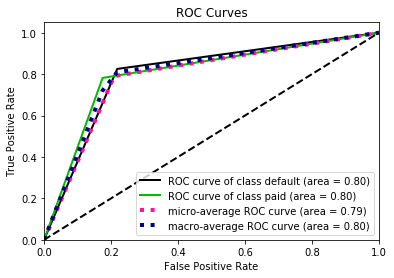

In [49]:
y_pred_proba = clf.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_pred_proba)

plt.savefig('resources/plots/DTree_roc.png', dpi=600)
plt.show()

## K Nearest Neighboor

In [50]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh = neigh.fit(X_train_scaled, y_train)

In [51]:
# print(f"Training Data Score: {neigh.score(X_train_scaled, y_train)}")
# print(f"Testing Data Score: {neigh.score(X_test_scaled, y_test)}")

In [52]:
predictions = neigh.predict(X_test_scaled)
predictions_KNN = pd.DataFrame({"Prediction": predictions, "Actual": y_test})
predictions_KNN.head()

,Prediction,Actual
86766,paid,paid
82602,paid,paid
395711,paid,paid
196538,paid,paid
206475,paid,paid


In [53]:
# F1 score
y_true = y_test
y_pred = predictions

#print(f1_score(y_true, y_pred))
print(f1_score(y_true, y_pred, average='macro'))
print(f1_score(y_true, y_pred, average='micro'))
print(f1_score(y_true, y_pred, average='weighted'))
print(f1_score(y_true, y_pred, average=None))

0.5512199620176459
0.776747256094981
0.7381143560459217
[0.233 0.869]


In [55]:
# Confusion Matric
confusion_matrix(y_true, y_pred)

array([[ 4009, 20366],
       [ 6016, 87780]])

Confusion matrix, without normalization
[[ 4009 20366]
 [ 6016 87780]]
Normalized confusion matrix
[[0.164 0.836]
 [0.064 0.936]]


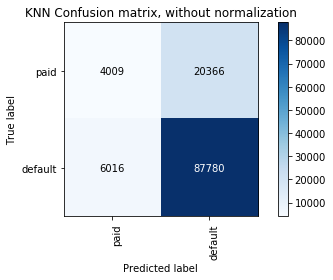

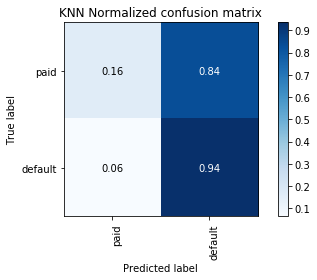

In [56]:
class_names = final_model_data.loan_status

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = class_names.unique()
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='KNN Confusion matrix, without normalization')
plt.savefig('resources/KNN_no_norm_confusion_matrix.png', dpi=600)
# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='KNN Normalized confusion matrix')

plt.savefig('resources/plots/KNN_normalized_confusion_matrix.png', dpi=600)
plt.show()

In [57]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ", tn)
print("False Positives: ", fp)
print("False Negatives: ", fn)
print("True Positives: ", tp)

True Negatives:  4009
False Positives:  20366
False Negatives:  6016
True Positives:  87780


In [58]:
#Accuracy
KNN_Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print(f"Accuracy: {KNN_Accuracy}")

Accuracy: 77.6747256094981


In [59]:
#Precision 
KNN_Precision = tp/(tp+fp) 
print(f"Precision: {KNN_Precision}")

Precision: 0.8116805059826531


In [60]:
#Recall 
KNN_Recall = tp/(tp+fn) 
print(f"Recall: {KNN_Recall}")

Recall: 0.9358608042986908


In [61]:
#F1 Score
KNN_f1 = (2*KNN_Precision*KNN_Recall)/(KNN_Precision + KNN_Recall)
print(f"F1 Score: {KNN_f1}")

F1 Score: 0.8693585286864546


In [62]:
#F-beta score calculation
def fbeta(KNN_Precision, KNN_Recall, beta):
    return ((1+pow(beta,2))*KNN_Precision*KNN_Recall)/(pow(beta,2)*KNN_Precision + KNN_Recall)
            
KNN_f2 = fbeta(KNN_Precision, KNN_Recall, 2)
KNN_f0_5 = fbeta(KNN_Precision, KNN_Recall, 0.5)

print(f"F2 {KNN_f2}")
print(f"\nF0.5 {KNN_f0_5}")

F2 0.9080752281050214

F0.5 0.8338082753904023


In [63]:
#Specificity 
KNN_Specificity = tn/(tn+fp)
print(f"Specificity {KNN_Specificity}")

Specificity 0.16447179487179486


/Users/rogerlefort/anaconda3/envs/loanDefault/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


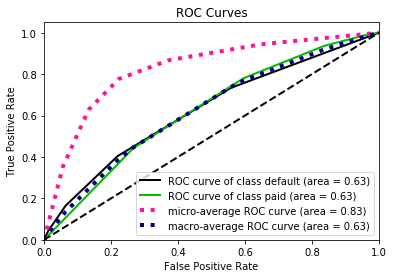

In [64]:
y_pred_proba = neigh.predict_proba(X_test_scaled)
skplt.metrics.plot_roc_curve(y_test, y_pred_proba)

plt.savefig('resources/plots/KNN_roc.png', dpi=600)
plt.show()

## XGBoost

In [65]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
XGBmodel = XGBClassifier()
XGBmodel.fit(X_train_scaled, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [66]:
predictions = XGBmodel.predict(X_test_scaled)
predictions_XGB = pd.DataFrame({"Prediction": predictions, "Actual": y_test})
predictions_XGB.head()

,Prediction,Actual
86766,paid,paid
82602,paid,paid
395711,paid,paid
196538,paid,paid
206475,paid,paid


In [67]:
# F1 score
y_true = y_test
y_pred = predictions

#print(f1_score(y_true, y_pred))
print(f1_score(y_true, y_pred, average='macro'))
print(f1_score(y_true, y_pred, average='micro'))
print(f1_score(y_true, y_pred, average='weighted'))
print(f1_score(y_true, y_pred, average=None))

0.8882206219274165
0.935703345152364
0.9310191278674972
[0.815 0.961]


In [68]:
# Confusion Matric
confusion_matrix(y_true, y_pred)

array([[16777,  7598],
       [    0, 93796]])

Confusion matrix, without normalization
[[16777  7598]
 [    0 93796]]
Normalized confusion matrix
[[0.688 0.312]
 [0.    1.   ]]


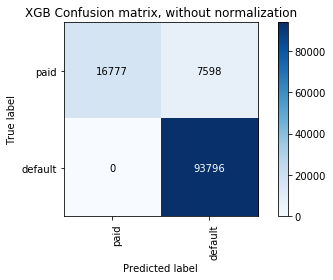

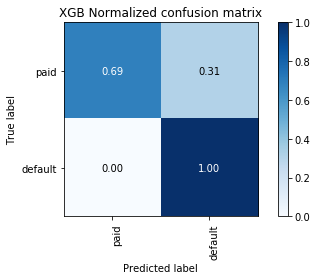

In [69]:
class_names = final_model_data.loan_status

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = class_names.unique()
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='XGB Confusion matrix, without normalization')
plt.savefig('resources/XGB_no_norm_confusion_matrix.png', dpi=600)
# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='XGB Normalized confusion matrix')

plt.savefig('resources/plots/XGB_normalized_confusion_matrix.png', dpi=600)
plt.show()

In [70]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ", tn)
print("False Positives: ", fp)
print("False Negatives: ", fn)
print("True Positives: ", tp)

True Negatives:  16777
False Positives:  7598
False Negatives:  0
True Positives:  93796


In [71]:
#Accuracy
XGB_Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print(f"Accuracy: {XGB_Accuracy}")

Accuracy: 93.5703345152364


In [72]:
#Precision 
XGB_Precision = tp/(tp+fp) 
print(f"Precision: {XGB_Precision}")

Precision: 0.9250645994832042


In [73]:
#Recall 
XGB_Recall = tp/(tp+fn) 
print(f"Recall: {XGB_Recall}")

Recall: 1.0


In [74]:
#F1 Score
XGB_f1 = (2*XGB_Precision*XGB_Recall)/(XGB_Precision + XGB_Recall)
print(f"F1 Score: {XGB_f1}")

F1 Score: 0.9610738255033556


In [75]:
#F-beta score calculation
def fbeta(XGB_Precision, XGB_Recall, beta):
    return ((1+pow(beta,2))*XGB_Precision*XGB_Recall)/(pow(beta,2)*XGB_Precision + XGB_Recall)
            
XGB_f2 = fbeta(XGB_Precision, XGB_Recall, 2)
XGB_f0_5 = fbeta(XGB_Precision, XGB_Recall, 0.5)

print(f"F2 {XGB_f2}")
print(f"\nF0.5 {XGB_f0_5}")

F2 0.9840571742715777

F0.5 0.9391395592864638


In [76]:
#Specificity 
XGB_Specificity = tn/(tn+fp)
print(f"Specificity {XGB_Specificity}")

Specificity 0.6882871794871794


/Users/rogerlefort/anaconda3/envs/loanDefault/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


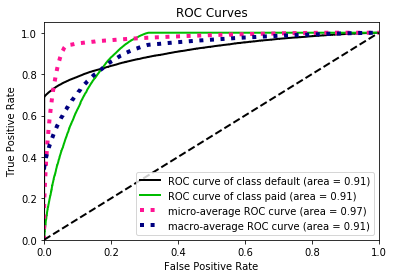

In [77]:
y_pred_proba = XGBmodel.predict_proba(X_test_scaled)
skplt.metrics.plot_roc_curve(y_test, y_pred_proba)

plt.savefig('resources/plots/XGB_roc.png', dpi=600)
plt.show()

## Naive Bayes

In [78]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [79]:
predictions = gnb.predict(X_test_scaled)
predictions_gnb = pd.DataFrame({"Prediction": predictions, "Actual": y_test})
predictions_gnb.head()

,Prediction,Actual
86766,paid,paid
82602,paid,paid
395711,paid,paid
196538,paid,paid
206475,paid,paid


In [80]:
# F1 score
y_true = y_test
y_pred = predictions

#print(f1_score(y_true, y_pred))
print(f1_score(y_true, y_pred, average='macro'))
print(f1_score(y_true, y_pred, average='micro'))
print(f1_score(y_true, y_pred, average='weighted'))
print(f1_score(y_true, y_pred, average=None))

0.8719012331513174
0.924786961267993
0.9202540381610994
[0.79  0.954]


In [81]:
# Confusion Matric
confusion_matrix(y_true, y_pred)

array([[16677,  7698],
       [ 1190, 92606]])

Confusion matrix, without normalization
[[16677  7698]
 [ 1190 92606]]
Normalized confusion matrix
[[0.684 0.316]
 [0.013 0.987]]


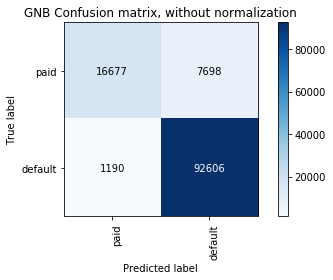

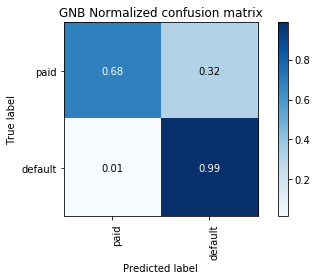

In [82]:
class_names = final_model_data.loan_status

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = class_names.unique()
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='GNB Confusion matrix, without normalization')
plt.savefig('resources/GNB_no_norm_confusion_matrix.png', dpi=600)
# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='GNB Normalized confusion matrix')

plt.savefig('resources/plots/GNB_normalized_confusion_matrix.png', dpi=600)
plt.show()

In [83]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ", tn)
print("False Positives: ", fp)
print("False Negatives: ", fn)
print("True Positives: ", tp)

True Negatives:  16677
False Positives:  7698
False Negatives:  1190
True Positives:  92606


In [84]:
#Accuracy
gnb_Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print(f"Accuracy: {gnb_Accuracy}")

Accuracy: 92.4786961267993


In [85]:
#Precision 
gnb_Precision = tp/(tp+fp) 
print(f"Precision: {gnb_Precision}")

Precision: 0.9232533099377891


In [86]:
#Recall 
gnb_Recall = tp/(tp+fn) 
print(f"Recall: {gnb_Recall}")

Recall: 0.987312891807753


In [87]:
#F1 Score
gnb_f1 = (2*XGB_Precision*XGB_Recall)/(XGB_Precision + XGB_Recall)
print(f"F1 Score: {gnb_f1}")

F1 Score: 0.9610738255033556


In [88]:
#F-beta score calculation
def fbeta(gnb_Precision, gnb_Recall, beta):
    return ((1+pow(beta,2))*gnb_Precision*gnb_Recall)/(pow(beta,2)*gnb_Precision + gnb_Recall)
            
gnb_f2 = fbeta(gnb_Precision, gnb_Recall, 2)
gnb_f0_5 = fbeta(gnb_Precision, gnb_Recall, 0.5)

print(f"F2 {gnb_f2}")
print(f"\nF0.5 {gnb_f0_5}")

F2 0.9737995490948247

F0.5 0.9353914652574079


In [89]:
#Specificity 
gnb_Specificity = tn/(tn+fp)
print(f"Specificity {gnb_Specificity}")

Specificity 0.6841846153846154


/Users/rogerlefort/anaconda3/envs/loanDefault/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


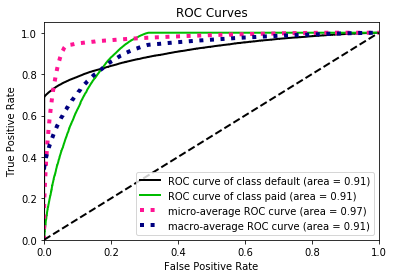

In [90]:
y_pred_proba = XGBmodel.predict_proba(X_test_scaled)
skplt.metrics.plot_roc_curve(y_test, y_pred_proba)

plt.savefig('resources/plots/gnb_roc.png', dpi=600)
plt.show()

In [120]:
# Compiling results
columns =  ['accuracy', 'precision', 'recall', 'specificity', 'f1', 'fbeta']
data= {'model' : ['Logistic Regression', 'Decision Tree', 'K-Nearest Neighbor', 'XGBoost', 'Naive Bayes'],
'accuracy' : [LogReg_Accuracy, DTree_Accuracy, KNN_Accuracy, XGB_Accuracy, gnb_Accuracy],
'precision' : [LogReg_Precision, DTree_Precision, KNN_Precision, XGB_Precision, gnb_Precision],
'specificity' : [LogReg_Specificity, DTree_Specificity, KNN_Specificity, XGB_Specificity, gnb_Specificity],
'recall' : [LogReg_Recall, DTree_Recall, KNN_Recall, XGB_Recall, gnb_Recall],
'f1' : [LogReg_f1, DTree_f1, KNN_f1, XGB_f1, gnb_f1],
'fbeta' : [LogReg_f2, DTree_f2, KNN_f2, XGB_f2, gnb_f2],
}

model_results_df = pd.DataFrame(data).set_index('model')
model_results_df.to_csv('lending-club/model_results.csv')

In [121]:
model_results_df

,accuracy,precision,specificity,recall,f1,fbeta
model,,,,,,
Logistic Regression,91.360825,0.901934,0.581662,0.999872,0.948381,0.917443
Decision Tree,87.701720,0.929428,0.732800,0.914495,0.921901,0.917443
K-Nearest Neighbor,77.674726,0.811681,0.164472,0.935861,0.869359,0.908075
XGBoost,93.570335,0.925065,0.688287,1.000000,0.961074,0.984057
Naive Bayes,92.478696,0.923253,0.684185,0.987313,0.961074,0.973800


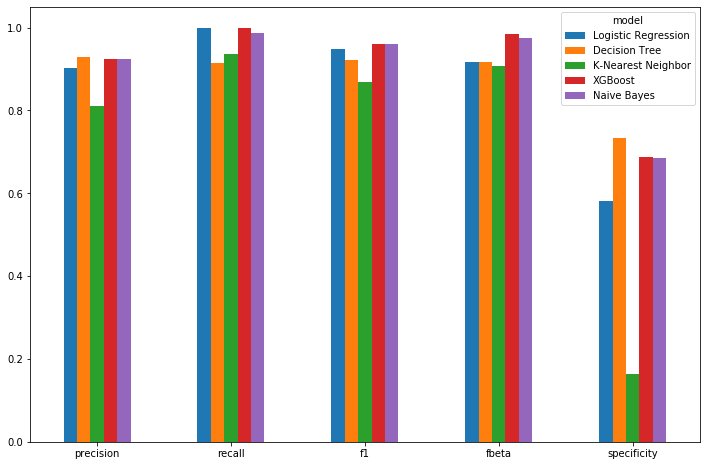

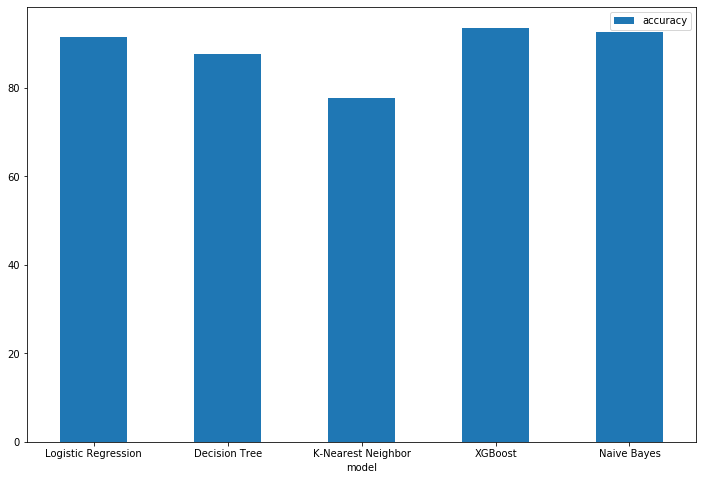

In [174]:
# Tranposing dataframe
transposed_results = model_resul_df[['precision', 'recall', 'f1', 'fbeta', 'specificity']].transpose()
ax = transposed_results.plot(kind='bar', figsize=(12,8), rot=0)
plt.savefig('resources/plots/model_results.png', dpi=600)

ax2 = model_resul_df[['accuracy']].plot(kind='bar', figsize=(12,8), rot=0)
plt.savefig('resources/plots/model_accuracies.png', dpi=600)